In [1]:
import pandas as pd
import sqlite3 
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

This code is in place to extract the necessary data from the set

In [2]:
cur.execute("""SELECT HomeTeam , FTHG FROM Matches WHERE season = 2011""")

In [3]:
dfa = pd.DataFrame(cur.fetchall())
dfa

,0,1
0,Nurnberg,0
1,Stuttgart,1
2,Wolfsburg,0
3,Mainz,3
4,Freiburg,0
...,...,...
987,Sunderland,0
988,Swansea,1
989,Tottenham,2
990,West Brom,2


In [4]:
dfa.isnull().values.any()

False

In [5]:
dfa.columns = ['HomeTeam' , 'HTG']

This adds up all of the goals scored by the home team in all their matches in 2011

In [6]:
dfa_final = dfa.groupby('HomeTeam').sum()
dfa_final

,HTG
HomeTeam,
Aachen,15
Arsenal,39
Aston Villa,20
Augsburg,20
Bayern Munich,49
Blackburn,26
Bochum,23
Bolton,23
Braunschweig,21


In [7]:
cur.execute("""SELECT AwayTeam , FTAG FROM Matches WHERE season = 2011""")
dfb = pd.DataFrame(cur.fetchall())
dfb

,0,1
0,Bayern Munich,1
1,Bayern Munich,2
2,Bayern Munich,1
3,Bayern Munich,2
4,Bayern Munich,0
...,...,...
987,Man United,1
988,Liverpool,0
989,Fulham,0
990,Arsenal,3


In [8]:
dfb.columns = ['AwayTeam' , 'ATG']

This does the same as the code above, except for away teams

In [9]:
dfb_final = dfb.groupby('AwayTeam').sum()
dfb_final

,ATG
AwayTeam,
Aachen,15
Arsenal,35
Aston Villa,17
Augsburg,16
Bayern Munich,28
Blackburn,22
Bochum,18
Bolton,23
Braunschweig,16


In [10]:
dfb.isnull().values.any()

False

In [11]:
cur.execute("""SELECT HomeTeam , FTR FROM Matches WHERE season = 2011""")
dfc = pd.DataFrame(cur.fetchall())
dfc

,0,1
0,Nurnberg,A
1,Stuttgart,A
2,Wolfsburg,A
3,Mainz,H
4,Freiburg,D
...,...,...
987,Sunderland,A
988,Swansea,H
989,Tottenham,H
990,West Brom,A


This code is the results for the home teams, where A denotes an away win, D a draw and H a home win, I therefore used the replace function to remove all of the unnecessary data (A , D) and only keep H

In [12]:
dfc.columns = ['HomeTeam1' , 'WDL']
dfc

,HomeTeam1,WDL
0,Nurnberg,A
1,Stuttgart,A
2,Wolfsburg,A
3,Mainz,H
4,Freiburg,D
...,...,...
987,Sunderland,A
988,Swansea,H
989,Tottenham,H
990,West Brom,A


In [13]:
dfc = dfc.replace('A', 0)

In [14]:
dfc = dfc.replace('D' , 0)

In [15]:
dfc

,HomeTeam1,WDL
0,Nurnberg,0
1,Stuttgart,0
2,Wolfsburg,0
3,Mainz,H
4,Freiburg,0
...,...,...
987,Sunderland,0
988,Swansea,H
989,Tottenham,H
990,West Brom,0


In [16]:
dfc = dfc.replace('H' , 1)
dfc.columns = ['HomeTeam1' , 'Hwins']

In [17]:
dfc_final = dfc.groupby('HomeTeam1').sum()

This code is to add up all of the wins, once I have replaced H with an integer to denote 1 == a win

In [18]:
dfc_final

,Hwins
HomeTeam1,
Aachen,4
Arsenal,12
Aston Villa,4
Augsburg,6
Bayern Munich,14
Blackburn,6
Bochum,7
Bolton,4
Braunschweig,6


In [19]:
cur.execute("""SELECT AwayTeam , FTR FROM Matches WHERE season = 2011""")
dfd = pd.DataFrame(cur.fetchall())
dfd

,0,1
0,Bayern Munich,A
1,Bayern Munich,A
2,Bayern Munich,A
3,Bayern Munich,H
4,Bayern Munich,D
...,...,...
987,Man United,A
988,Liverpool,H
989,Fulham,H
990,Arsenal,A


The below code does the same thing as the above, but for away teams

In [20]:
dfd.columns = ['AwayTeam1' , 'WDL']
dfd

,AwayTeam1,WDL
0,Bayern Munich,A
1,Bayern Munich,A
2,Bayern Munich,A
3,Bayern Munich,H
4,Bayern Munich,D
...,...,...
987,Man United,A
988,Liverpool,H
989,Fulham,H
990,Arsenal,A


In [21]:
dfd = dfd.replace('H', 0)

In [22]:
dfd = dfd.replace('D' , 0)

In [23]:
dfd = dfd.replace('A' , 1)

In [24]:
dfd

,AwayTeam1,WDL
0,Bayern Munich,1
1,Bayern Munich,1
2,Bayern Munich,1
3,Bayern Munich,0
4,Bayern Munich,0
...,...,...
987,Man United,1
988,Liverpool,0
989,Fulham,0
990,Arsenal,1


In [25]:
dfd.columns = ['AwayTeam1' , 'AWins']

In [26]:
dfd

,AwayTeam1,AWins
0,Bayern Munich,1
1,Bayern Munich,1
2,Bayern Munich,1
3,Bayern Munich,0
4,Bayern Munich,0
...,...,...
987,Man United,1
988,Liverpool,0
989,Fulham,0
990,Arsenal,1


In [27]:
dfd_final = dfd.groupby('AwayTeam1').sum()

In [28]:
dfd_final

,AWins
AwayTeam1,
Aachen,2
Arsenal,9
Aston Villa,3
Augsburg,2
Bayern Munich,9
Blackburn,2
Bochum,3
Bolton,6
Braunschweig,4


In [29]:
table_final = pd.concat([dfa_final, dfb_final , dfc_final , dfd_final], axis=1)

In [30]:
import numpy as np
table_final["Total Goals"] = np.nan
table_final["Total Wins"] = np.nan

In [31]:
table_final['Total Goals'] = table_final['HTG'] + table_final['ATG'] 
table_final['Total Wins'] = table_final['Hwins'] + table_final['AWins'] 

This code is to concatenate all of the above dataframes together into a final data frame with all the relevant info

In [32]:
table_final

,HTG,ATG,Hwins,AWins,Total Goals,Total Wins
Aachen,15,15,4,2,30,6
Arsenal,39,35,12,9,74,21
Aston Villa,20,17,4,3,37,7
Augsburg,20,16,6,2,36,8
Bayern Munich,49,28,14,9,77,23
Blackburn,26,22,6,2,48,8
Bochum,23,18,7,3,41,10
Bolton,23,23,4,6,46,10
Braunschweig,21,16,6,4,37,10
Chelsea,41,24,12,6,65,18


In [33]:
cur.execute("""SELECT HomeTeam , FTR FROM Matches WHERE season = 2011""")
dfe = pd.DataFrame(cur.fetchall())
dfe

,0,1
0,Nurnberg,A
1,Stuttgart,A
2,Wolfsburg,A
3,Mainz,H
4,Freiburg,D
...,...,...
987,Sunderland,A
988,Swansea,H
989,Tottenham,H
990,West Brom,A


In [34]:
dfe.columns = ['HomeTeam2' , 'HLosses']

In [35]:
dfe = dfe.replace('D' , 0)

In [36]:
dfe = dfe.replace('H' , 0)

In [37]:
dfe = dfe.replace('A' , 1)

In [38]:
dfe_final = dfe.groupby('HomeTeam2').sum()

In [39]:
cur.execute("""SELECT AwayTeam , FTR FROM Matches WHERE season = 2011""")
dff = pd.DataFrame(cur.fetchall())
dff

,0,1
0,Bayern Munich,A
1,Bayern Munich,A
2,Bayern Munich,A
3,Bayern Munich,H
4,Bayern Munich,D
...,...,...
987,Man United,A
988,Liverpool,H
989,Fulham,H
990,Arsenal,A


In [40]:
dff.columns = ['AwayTeam2' , 'ALosses']

In [41]:
dff = dff.replace('D' , 0)

In [42]:
dff = dff.replace('A' , 0)

In [43]:
dff = dff.replace('H' , 1)

In [44]:
dff_final = dff.groupby('AwayTeam2').sum()

In [45]:
table_final_final = pd.concat([table_final , dfe_final , dff_final], axis=1)

In [46]:
table_final_final

,HTG,ATG,Hwins,AWins,Total Goals,Total Wins,HLosses,ALosses
Aachen,15,15,4,2,30,6,7,8
Arsenal,39,35,12,9,74,21,3,7
Aston Villa,20,17,4,3,37,7,8,6
Augsburg,20,16,6,2,36,8,4,8
Bayern Munich,49,28,14,9,77,23,2,5
Blackburn,26,22,6,2,48,8,12,11
Bochum,23,18,7,3,41,10,7,10
Bolton,23,23,4,6,46,10,11,11
Braunschweig,21,16,6,4,37,10,3,6
Chelsea,41,24,12,6,65,18,4,6


This code is to make a frame with the total losses and wins, to visualise a team's success this season

In [47]:
table_final_final['Total Losses'] = table_final_final['HLosses'] + table_final_final['ALosses'] 

In [48]:
ftable = table_final_final

In [49]:
import matplotlib.pyplot as plt

I made the variable better here, then created an individual table for wins/losses for easier graph making

In [50]:
vframe = ftable[['Total Wins','Total Losses']]

In [51]:
vframe

,Total Wins,Total Losses
Aachen,6,15
Arsenal,21,10
Aston Villa,7,14
Augsburg,8,12
Bayern Munich,23,7
Blackburn,8,23
Bochum,10,17
Bolton,10,22
Braunschweig,10,9
Chelsea,18,10


The below table shows each team's losses in the season, to demonstrate their success level

Text(0, 0.5, 'Total losses')

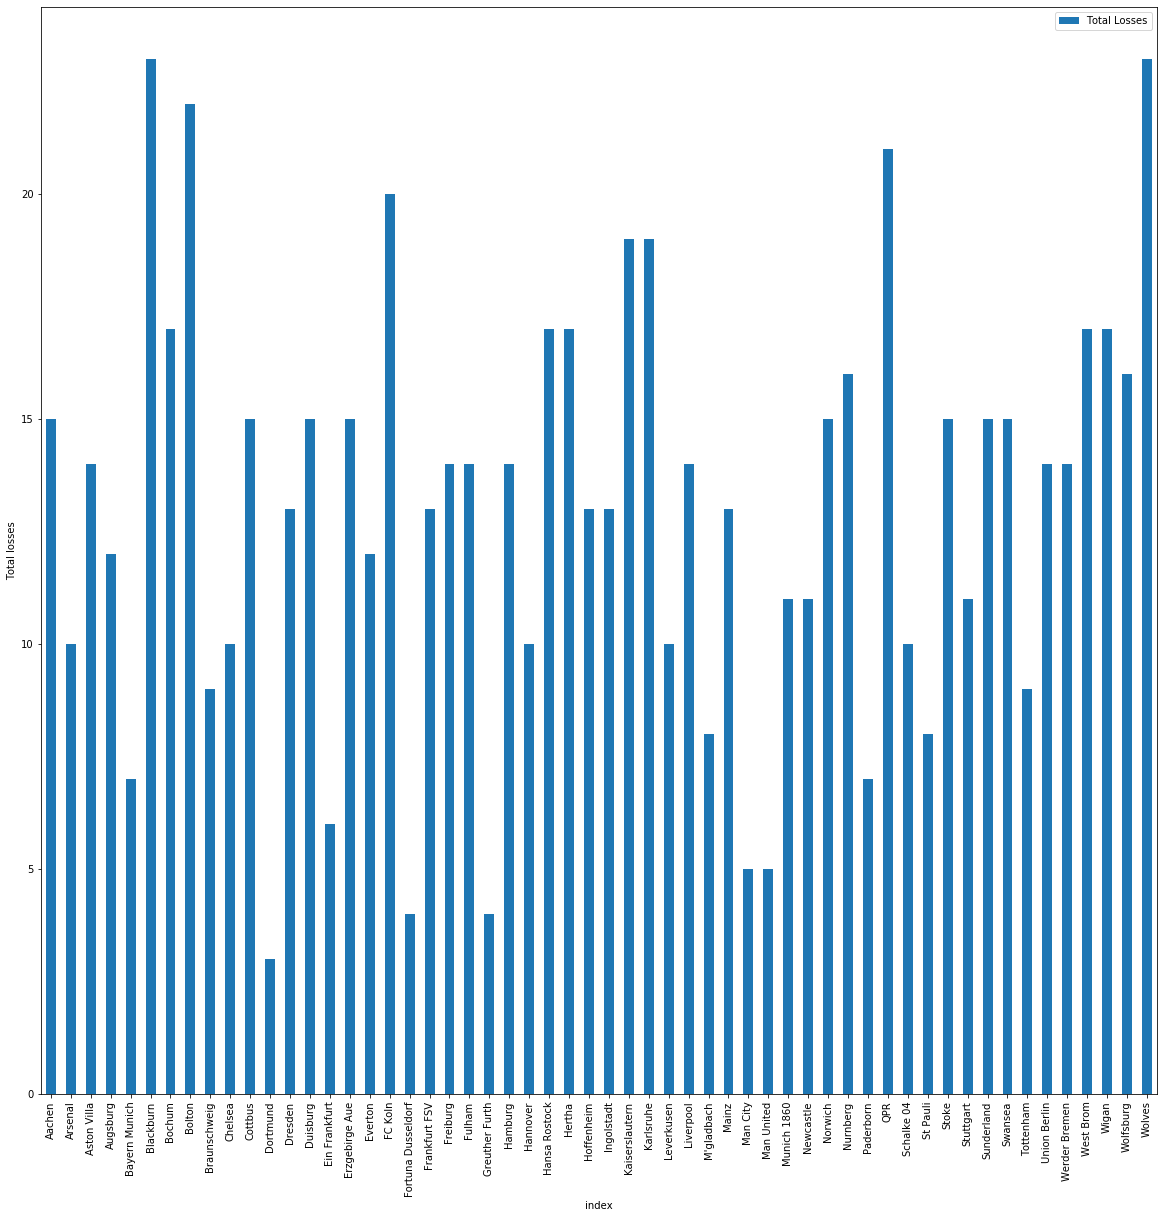

In [111]:
ax = vframe.reset_index().plot.bar(figsize=(20,20) , x='index', y='Total Losses',)
ax.set_ylabel("Total losses")

The below code did run, I am not sure why it stopped working. I had managed to extract the relevant data from the API, and it was supposed to append into another list, but it just generated an empty list, and stopped responding to 'daily' as an input

In [113]:
import json
import sqlite3 
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()
cur.execute("""SELECT Date FROM Matches WHERE season = 2011""")
weather_df = pd.DataFrame(cur.fetchall())

In [114]:
weather_df

,0
0,2012-03-31
1,2011-12-11
2,2011-08-13
3,2011-11-27
4,2012-02-18
...,...
987,2012-05-13
988,2012-05-13
989,2012-05-13
990,2012-05-13


In [115]:
weather_df.columns = ['Date']

In [116]:
weather_df['Date'].unique

<bound method Series.unique of 0      2012-03-31
1      2011-12-11
2      2011-08-13
3      2011-11-27
4      2012-02-18
          ...    
987    2012-05-13
988    2012-05-13
989    2012-05-13
990    2012-05-13
991    2012-05-13
Name: Date, Length: 992, dtype: object>

In [118]:
date_list = weather_df['Date']
date_list = date_list.unique()
date_list

array(['2012-03-31', '2011-12-11', '2011-08-13', '2011-11-27',
       '2012-02-18', '2012-01-20', '2012-02-04', '2012-04-21',
       '2011-09-18', '2011-10-23', '2011-10-01', '2012-03-03',
       '2011-08-27', '2012-03-17', '2011-11-06', '2012-05-05',
       '2012-04-11', '2011-12-17', '2012-02-03', '2011-10-29',
       '2012-01-22', '2011-12-03', '2012-04-14', '2012-03-25',
       '2012-03-10', '2012-04-07', '2011-11-19', '2011-10-14',
       '2011-09-24', '2012-04-28', '2011-12-18', '2012-03-02',
       '2012-03-16', '2012-02-17', '2011-08-06', '2011-11-04',
       '2011-09-16', '2011-07-15', '2012-05-06', '2012-02-11',
       '2011-10-02', '2012-03-30', '2011-10-22', '2011-08-26',
       '2011-08-07', '2012-02-24', '2011-07-17', '2012-02-12',
       '2011-08-22', '2011-09-09', '2012-04-01', '2011-09-25',
       '2012-04-20', '2011-11-25', '2012-03-09', '2011-11-07',
       '2011-09-10', '2011-08-21', '2011-09-26', '2012-03-26',
       '2011-10-30', '2012-02-13', '2012-02-26', '2011-

In [119]:
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)
keys = get_keys("/Users/alexbenn/.secret/darksky_api.json")
api_key = keys['darksky_key']
time = '2012-12-11T00:00:00Z'


In [121]:
import requests
class WeatherGetter():
    date_weather = []
    for date in date_list:
        time = date + 'T00:00:00Z'
        response = requests.get(f"https://api.darksky.net/forecast/{api_key}/52.520,13.4050,{time}")
        weather = response.json()['daily']['data'][0].get('summary') 
        print(date , weather)
pass

KeyError: 'daily'

In [122]:
for date in date_list:
        time = date + 'T00:00:00Z'
        response = requests.get(f"https://api.darksky.net/forecast/{api_key}/52.520,13.4050,{time}")
        weather = response.json()['daily']['data'][0].get('summary') 
        print(date , weather)

KeyError: 'daily'

The above code was working, until the API stopped providing 'daily'

In [106]:
# This was the result, before 'daily' stopped responding, of the above date_weather list, despite the .append command

[]